In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras import backend as K
import seaborn as sns

In [ ]:
# Read the dataset

In [ ]:
titanic_df = pd.read_csv('Keras/titanic/train.csv')
titanic_test_df = pd.read_csv('Keras/titanic/test.csv')

In [ ]:
# Feature cleaning 

In [ ]:
useless_cols = ['Name','PassengerId','Ticket']
titanic_df = titanic_df.drop(useless_cols, axis=1)
passengerIds_test = titanic_test_df[['PassengerId']]
titanic_test_df = titanic_test_df.drop(useless_cols, axis=1)

In [ ]:
# Feature Engineering

In [ ]:
# helper functions
def clean_feature_columns(df, feature_columns):
    """ check if feature columns have any NaNs.
    Feature columns are used in groupby.
    They should not have any nans.
    """
    clean_cols = []
    for col in feature_columns:
        if df[col].isnull().any():
            continue
        else:
            clean_cols.append(col)
    return clean_cols

def fill_numeric_col(df, feature_columns, target_column):
    """
    We fill the numeric columns by median. 
    
    feature_columns : list. This will create group-by sub-indexes. The order
    will be as it appears in the list. If a particular sub-index results in
    median value of NaN, it is automatically dropped from feature_columns
    
    target_column: the target column that is to be filled
    """
    filled_col_name = target_column + '_filled'
    if df[target_column].isnull().any():
        df[filled_col_name] = df.groupby(feature_columns)[target_column]\
            .transform(lambda x: x.fillna(np.nan if pd.isnull(x.median()) else x.median()))
        while True:
            if df[filled_col_name].isnull().any():
                if len(feature_columns) > 1:
                    del feature_columns[-1]
                    df[filled_col_name] = df.groupby(feature_columns)[filled_col_name]\
            .transform(lambda x: x.fillna(np.nan if pd.isnull(x.median()) else x.median()))
                else:
                    df[filled_col_name] = df[filled_col_name].fillna(df[target_column].median(dropna=True))
                    break
            else:
                break
        return df
    else:
        df[filled_col_name] = df[target_column]
        return df

def fill_categoric_col(df, feature_columns, target_column):
    """
    We fill the categorical columns by mode. 
    
    feature_columns : list. This will create group-by sub-indexes. The order
    will be as it appears in the list. If a particular sub-index results in
    mode value of NaN, it is automatically dropped from feature_columns
    
    target_column: the target column that is to be filled
    """
    filled_col_name = target_column + '_filled'
    if df[target_column].isnull().any():
        df[filled_col_name] = df.groupby(feature_columns)[target_column]\
            .transform(lambda x: x.fillna(np.nan if x.count()<=0 else x.mode()[0]))
        while True:
            if df[filled_col_name].isnull().any():
                if len(feature_columns) > 1:
                    del feature_columns[-1]
                    df[filled_col_name] = df.groupby(feature_columns)[filled_col_name]\
            .transform(lambda x: x.fillna(np.nan if x.count()<=0 else x.mode()[0]))
                else:
                    df[filled_col_name] = df[filled_col_name].fillna(df[target_column].mode(dropna=True))
                    break
            else:
                break
        return df
    else:
        df[filled_col_name] = df[target_column]
        return df

In [ ]:
# visualizations
titanic_df.head()

In [ ]:
# definitely females survuved better than males
# strong correlation between sex and survival
ax = sns.countplot(data=titanic_df, hue='Survived', x='Sex')

In [ ]:
# definitely strong relation between survival rates for both males and females w.r.t. Pclass
ax = sns.catplot(data=titanic_df, col='Sex',
                y=None, x='Pclass', hue='Survived',
                kind='count')

In [ ]:
titanic_age = titanic_df[~titanic_df.Age.isnull()]
ax = sns.catplot(data=titanic_df, col='Sex',
                y=None, x='Pclass', hue='Survived',
                kind='count')

In [70]:
titanic_age = titanic_df[~titanic_df.Age.isnull()]
titanic_age['adult'] = titanic_age.Age.map(lambda x: x>=18).astype('int')

__main__:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


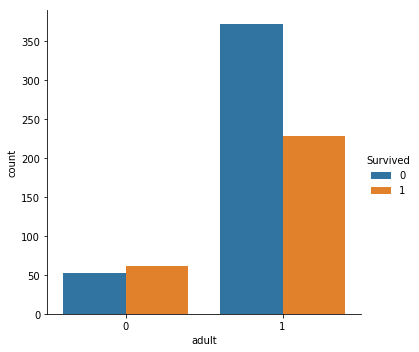

In [72]:
# proportion of non-adults that survived (ratio of survived vs non-survived) 
# is definitely higher than that of adults
ax = sns.catplot(data=titanic_age, 
                y=None, x='adult', hue='Survived',
                kind='count')